# k-means(k平均法)のPythonによるフルスクラッチ

### アルゴリズムの実態

0. kを決める
1. 初期値をk個決定する
2. 重心に近い点を決定する
3. それぞれの重心にそれぞれの重心を移動する（パワーワード感）
4. 2~3.を繰り返す
5. kを変更して1に戻る

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import cv2 as cv
%matplotlib inline

## ダミーデータを作成する

(82, 2)


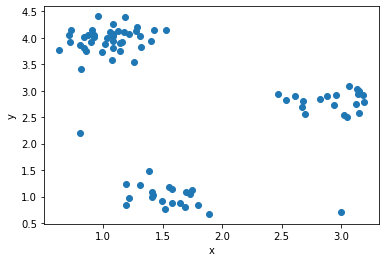

In [16]:
n_data0 = 40             #1.データの数
n_data1 = 20
n_data2 = 20

mean0 = [1, 4]          #2.データ０における平均値（ｘ、ｙ）
mean1 = [3.0, 2.8]
mean2 = [1.4, 1]
noise = [[0.8, 2.2],
         [3.0, 0.7]]


cov0  = [[0.04, 0.0],
         [0.0, 0.04]]    #3.データ０における共分散行列
cov1  = [[0.04, 0.0],
         [0.0, 0.04]]
cov2  = [[0.04, 0.0],
         [0.0, 0.04]]


#二次元正規分布を生成する（0~3の値によって変動する）
X0 = np.random.multivariate_normal(mean0, cov0, n_data0)
X1 = np.random.multivariate_normal(mean1, cov1, n_data1)
X2 = np.random.multivariate_normal(mean2, cov2, n_data2)

#それぞれのデータの結合
X = np.concatenate((X0, X1, X2, noise))
print(X.shape)

plt.scatter(X[:,0],X[:,1],)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
class kmeans():
    def __init__(self,plus=False,n_search=10,plot=True):
        self.plus = plus
        self.n_search = n_search
        self.plot = plot
        
    def clustering(self):
        dist_list = [0]*self.k
        sse_sum = 0
        for c in range(self.k):
            sse = (self.X-self.center[c])**2
            dist_list[c] = np.sum(sse, axis=1)
        
        self.cluster = np.argmin(np.array(dist_list),axis=0)
        
        return self.cluster,np.sqrt(np.sum(np.min(dist_list,axis=0))**(1/2))
    
    #初期値決定
    def init_center(self,n_sample,k,n_dims):
        if self.plus == False:
            self.center = self.X[np.random.choice(np.arange(0,n_sample),k),:]
            #print(self.center)
        
        #k-means++の初期値決定
        else:
            distance = np.zeros((n_sample,k))
            #最初の重心決定確率は一律
            pr = np.ones(n_sample)/n_sample
            self.center = np.zeros((k,n_dims))
            self.center[0,:] = self.X[np.random.choice(np.arange(0,n_sample),1,p=pr),:]
            for c in range(1,k):
                flag = True
                while flag:
                    #重心決定
                    center_candidate = self.X[np.random.choice(np.arange(0,n_sample),1,p=pr),:]
                    flag = np.any(self.center == center_candidate) #すでに選ばれた重心なら、もう一度探索
                #print(center_candidate)
                self.center[c] = center_candidate

                #距離を求める
                distance[:,c] = (np.sum((self.X-self.center[c])**2,axis=1))**0.5
                #重心決定の確率更新
                pr = np.sum(distance,axis=1) / np.sum(distance)
    
    #fiding centers
    def fit(self,X,k):
        self.X = X
        self.k = k
        self.sse_list = []
        self.center_list = []
        self.cluster_list = []
        n_sample = X.shape[0]
        n_dims = X.shape[1]
        
        
        
        #学習
        for i in range(self.n_search):
            #初期位置決定
            self.init_center(n_sample,k,n_dims)
            old_center = np.array([np.inf for i in range(n_dims)])
            while np.sum(((old_center-self.center)**2))**0.5 > 10e-8:
                self.clustering()

                old_center = self.center.copy()

                #重心を更新
                for i in list(set(self.cluster)):
                    self.center[i] = np.mean(X[self.cluster==i],axis=0)
            
            cluster, sse = self.clustering()
            self.cluster_list.append(cluster)
            self.sse_list.append(sse)
            self.center_list.append(self.center)
            
            #可視化するかしないか
            if self.plot == True:
                plt.scatter(X[:,0], X[:,1],c=self.cluster)
                plt.scatter(self.center[:,0], self.center[:,1],s=10,c="r")
                plt.xlabel('x')
                plt.ylabel('y')
                plt.show()
        
        #候補のうちSSE最小になった時の値を抽出
        best_idx = np.argmin(self.sse_list)
        best_sse = self.sse_list[best_idx]
        best_cluster = self.cluster_list[best_idx]
        best_center = self.center_list[best_idx]
        
        #ベストなクラスタリングのプロット(消してもいい)
        plt.scatter(X[:,0], X[:,1],c=best_cluster)
        plt.scatter(best_center[:,0], best_center[:,1],s=10,c="r")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
        
        return best_sse, best_center ,best_cluster

No.1


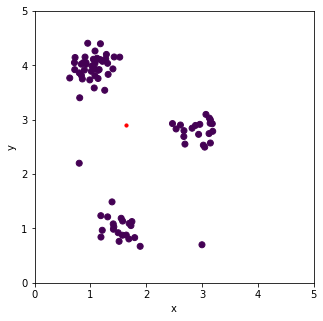

No.1


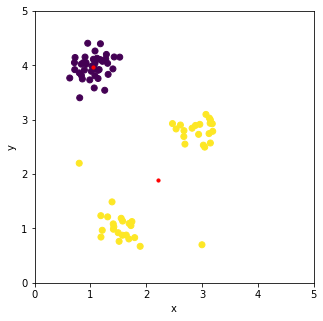

No.1


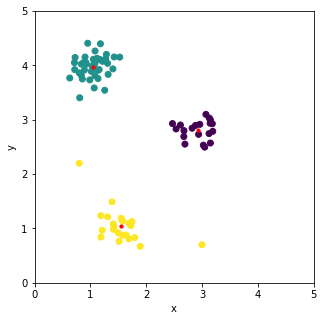

No.1


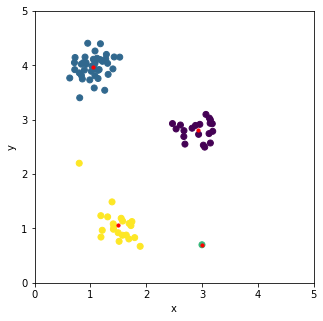

No.1


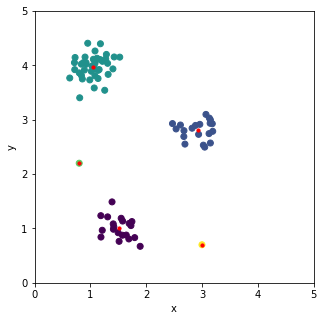

No.1


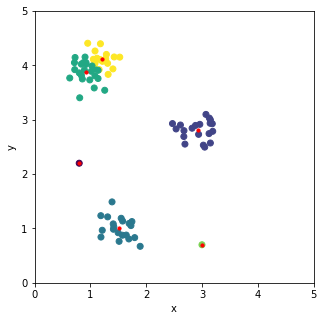

No.1


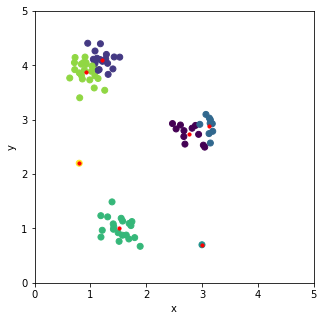

No.1


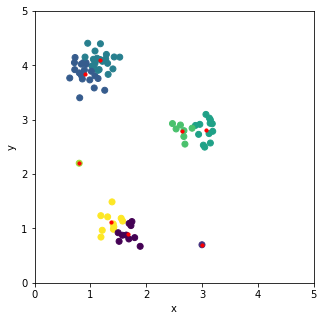

No.1


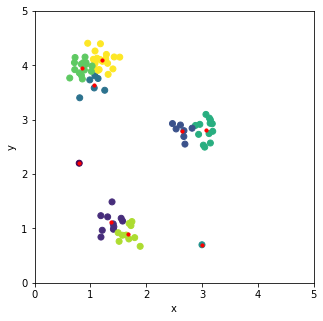

No.1


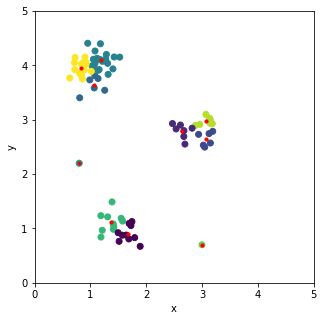

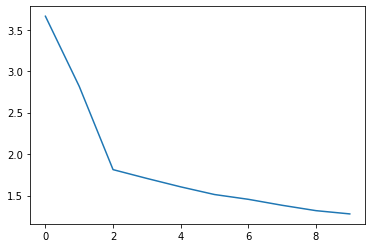

In [18]:
kmn = kmeans(plus=True,n_search=100,plot=False)
elbow_list = []
for i in range(1,11):
    plt.figure(figsize=(5,5))
    plt.xlim(0,5)
    plt.ylim(0,5)
    best_sse, _ , _= kmn.fit(X,i)
    elbow_list.append(best_sse)
    plt.show()


plt.plot(elbow_list)
plt.show()

In [6]:
#画像のリサイズ・リシェイプ、表示
def kmn_implot(img, rate=1, verbose=True):
    Height,Width,RGB = img.shape
    img_min = cv.resize(img, (Width // rate, Height // rate))
    Height_min, Width_min, RGB_min = img_min.shape
    return img_min

No.1


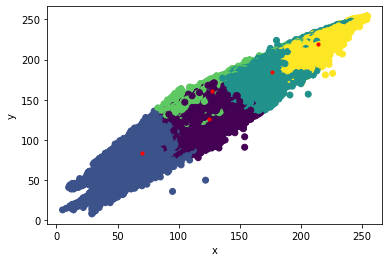

In [7]:
img1 = plt.imread("Data/Cat.jpg")
img_min1 = kmn_implot(img1,rate=6 ,verbose=True)
W1, H1, Ch1 = img_min1.shape
col1 = img_min1.reshape(-1,3)

kmn_cat = kmeans(plus=True,n_search=2, plot=False)
_,best_center1, best_cluster1 = kmn_cat.fit(X=col1, k=5)

圧縮後の画像
(231, 333, 3)


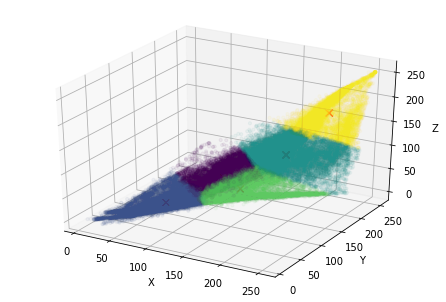

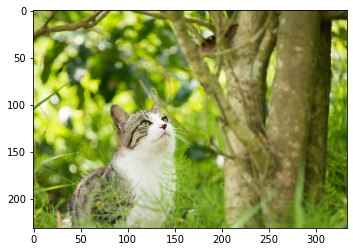

In [8]:
#プロットしてみる
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter(col1[:,0],col1[:,1],col1[:,2],marker="o",c=best_cluster1,s=10,alpha=0.05)
ax.scatter(best_center1[:,0],best_center1[:,1],best_center1[:,2],marker="x",c="r",s=50,alpha=1)


print("圧縮後の画像")
print(img_min1.shape)
plt.show()
plt.imshow(img_min1)
#plt.show()

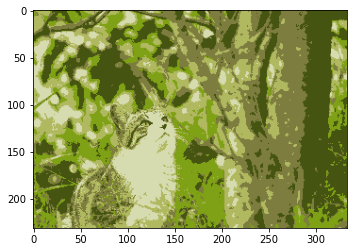

In [9]:
img1_kmn = np.empty(col1.shape,"uint8")
best_center1 = best_center1.astype("uint8")

for i,c in enumerate(best_cluster1):
    img1_kmn[i,:] = best_center1[c,:]
    
img1_kmn = img1_kmn.reshape(W1, H1, Ch1).astype("uint8")
#display(X_kmn)
plt.imshow(img1_kmn)
plt.show()

No.1


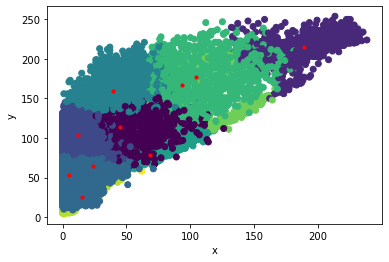

In [10]:
img2 = plt.imread("Data/Sea-tropical.jpg")
img_min2 = kmn_implot(img2,rate=2 ,verbose=True)
W2, H2, Ch2 = img_min2.shape
col2 = img_min2.reshape(-1,3)

kmn_tropical = kmeans(plus=True,n_search=2, plot=False)
_,best_center2, best_cluster2 = kmn_cat.fit(X=col2, k=10)

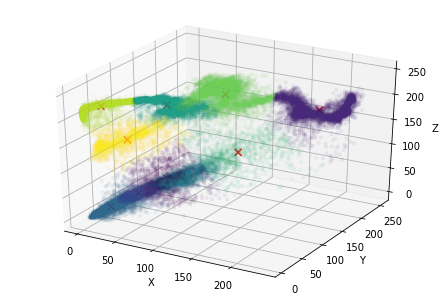

圧縮後の画像


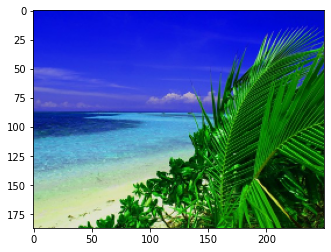

In [11]:
#プロットしてみる
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter(col2[:,0],col2[:,1],col2[:,2],marker="o",c=best_cluster2,s=10,alpha=0.05)
ax.scatter(best_center2[:,0],best_center2[:,1],best_center2[:,2],marker="x",c="r",s=50,alpha=1)
plt.show()
print("圧縮後の画像")
plt.imshow(img_min2)
plt.show()

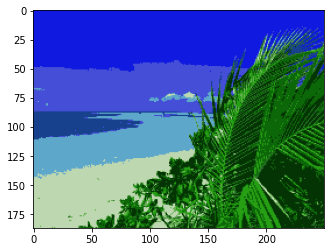

In [12]:
img2_kmn = np.empty(col2.shape,"uint8")
best_center2 = best_center2.astype("uint8")

for i,c in enumerate(best_cluster2):
    img2_kmn[i,:] = best_center2[c,:]
    
img2_kmn = img2_kmn.reshape(W2, H2, 3).astype("uint8")
#display(X_kmn)
plt.imshow(img2_kmn)
plt.show()

No.1


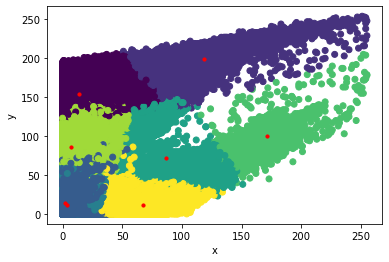

In [13]:
img3 = plt.imread("Data/Sea-View.jpg")
img_min3 = kmn_implot(img3,rate=2 ,verbose=True)
W3, H3, Ch3 = img_min3.shape
col3 = img_min3.reshape(-1,3)

kmn_tropical = kmeans(plus=True,n_search=1, plot=False)
_,best_center3, best_cluster3 = kmn_cat.fit(X=col3, k=8)

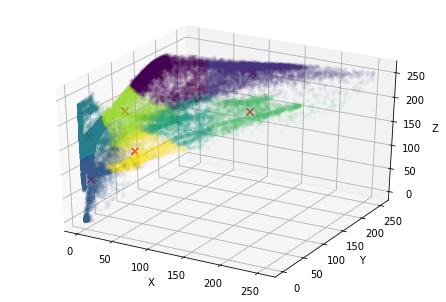

圧縮後の画像


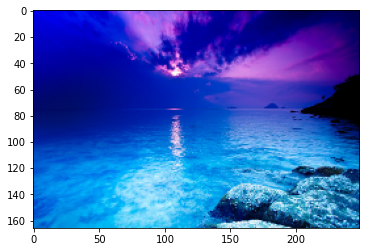

In [14]:
#プロットしてみる
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter(col3[:,0],col3[:,1],col3[:,2],marker="o",c=best_cluster3,s=10,alpha=0.05)
ax.scatter(best_center3[:,0],best_center3[:,1],best_center3[:,2],marker="x",c="r",s=50,alpha=1)
plt.show()
print("圧縮後の画像")
plt.imshow(img_min3)
plt.show()

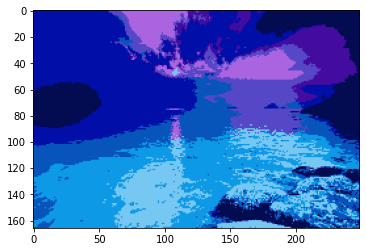

In [15]:
img3_kmn = np.empty(col3.shape,"uint8")
best_center3 = best_center3.astype("uint8")

for i,c in enumerate(best_cluster3):
    img3_kmn[i,:] = best_center3[c,:]
    
img3_kmn = img3_kmn.reshape(W3, H3, 3).astype("uint8")
#display(X_kmn)
plt.imshow(img3_kmn)
plt.show()